<a href="https://colab.research.google.com/github/dev-abdulraheem/Employee-churn-Prediction/blob/master/HR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# connecting to the Google drive
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data Sets

In [ ]:
A= pd.read_excel('drive/MyDrive/Employees_Churn_Prediction/2018_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
B=pd.read_excel('drive/MyDrive/Employees_Churn_Prediction/2019_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
C=pd.read_excel('drive/MyDrive/Employees_Churn_Prediction/2020_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
D=pd.read_excel('drive/MyDrive/Employees_Churn_Prediction/2021_03_31_Establishment_Data_Extract.xlsx')

In [ ]:
E=pd.read_excel('drive/MyDrive/Employees_Churn_Prediction/2022_03_31_Establishment_Data_Extract.xlsx')

Checking across each file 

In [ ]:
A.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,NaT,NaT,NaN,740974004Y,1950110spi,NaN,NaN,0,NaN,1
1,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,NaT,NaT,NaN,740974004Y,2102900LiG,NaN,NaN,0,NaN,1
2,0,2018-02-01,2018-02-28,02/2018,2,1,17/18,0,0,0,...,NaT,NaT,NaN,740974004Y,32054807if,NaN,NaN,0,NaN,1


In [ ]:
B.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2019-02-01,2019-02-28,02/2019,2,1,18/19,0,0,0,...,NaT,NaT,NaN,740974004Y,39330321kR,NaN,NaN,0,NaN,1
1,0,2019-02-01,2019-02-28,02/2019,2,1,18/19,0,0,0,...,2018-08-01,2020-04-30,NaN,740974004Y,2095201Qg6,4114111Qg6,43616601YZ,1,NaN,1
2,0,2019-02-01,2019-02-28,02/2019,2,1,18/19,0,0,0,...,2019-01-10,2019-12-31,Occasional Worker Contract,740974004Y,6412671vGm,8100261vGm,0279480NN0,1,NaN,1


In [ ]:
C.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2020-04-01,2020-04-30,04/2020,4,1,19/20,0,0,0,...,2019-01-01,2020-07-31,NaN,740974004Y,4023981tM3,3164661tM3,2885250BiC,1,NaN,1
1,0,2020-04-01,2020-04-30,04/2020,4,1,19/20,0,0,0,...,NaT,NaT,NaN,740974004Y,45440701YW,NaN,NaN,0,NaN,1
2,0,2020-04-01,2020-04-30,04/2020,4,1,19/20,0,0,0,...,2019-10-07,2021-08-31,NaN,740974004Y,7632452tma,0731832tma,9384112YE2,1,NaN,1


In [ ]:
D.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2021-02-01,2021-02-28,02/2021,2,1,20/21,0,0,0,...,NaT,NaT,NaN,740974004Y,2925091B9P,NaN,NaN,0,NaN,1
1,0,2021-02-01,2021-02-28,02/2021,2,1,20/21,0,0,0,...,NaT,NaT,NaN,740974004Y,55057901YW,NaN,NaN,0,NaN,1
2,0,2021-02-01,2021-02-28,02/2021,2,1,20/21,0,0,0,...,NaT,NaT,NaN,740974004Y,7892541AJz,NaN,NaN,0,NaN,1


In [ ]:
E.head(3)

,Month Number,START PERIOD,END PERIOD,REPORT RUN PERIOD,REPORT MONTH,YTD FLAG,Academic Year,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,...,START DATE OCCUPANCY,END DATE OCCUPANCY,Expected Occupancy End Reason,ORG PARTY ID,POSITION ID,PARTY LNK ID OCCUPANCY,PERSON ID,distinct person id,Unnamed: 89,distinct position id
0,0,2022-02-01,2022-02-28,02/2022,2,1,21/22,0,0,0,...,2021-08-17,NaT,Time Limited Requirement,740974004Y,0636774lDg,7654494luD,3439144l6v,1,NaN,1
1,0,2022-02-01,2022-02-28,02/2022,2,1,21/22,0,0,0,...,2021-09-20,NaT,Occasional Worker Contract,740974004Y,4075844rf6,9594914rf6,4756304rf6,1,NaN,1
2,0,2022-02-01,2022-02-28,02/2022,2,1,21/22,0,0,0,...,2021-03-01,NaT,NaN,740974004Y,93800546mB,39215646mB,88844346mB,1,NaN,1


Concatinating All the files

In [ ]:
#Concatinating the files together for easier analysis
dt = [A,B,C,D,E]
df = pd.concat(dt)

In [ ]:
df.shape

(291837, 91)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291837 entries, 0 to 52434
Data columns (total 91 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Month Number                                291837 non-null  int64         
 1   START PERIOD                                291837 non-null  datetime64[ns]
 2   END PERIOD                                  291837 non-null  datetime64[ns]
 3   REPORT RUN PERIOD                           291837 non-null  object        
 4   REPORT MONTH                                291837 non-null  int64         
 5   YTD FLAG                                    291837 non-null  int64         
 6   Academic Year                               291837 non-null  object        
 7   FIN YTD START FLAG                          291837 non-null  int64         
 8   FIN YTD START POS                           291837 non-null  int64         

In [ ]:
df['LEAVING REASON'].mode()

0    Contract Expired
dtype: object

As the aim of this project is to predict employees churn, so we are generating the column to be predicted using the 'LEAVING REASON' column, which basically means if the "LEAVING REASON" column has no value, it means the employee has left the organization and vice versa


In [ ]:
df['LEAVING REASON'].isna().sum()
# Generate the Churn Column
df['Churn'] = np.where(df['LEAVING REASON'].isnull(), 'No', 'Yes')

In [ ]:
df['Churn'].tail()

52430     No
52431     No
52432     No
52433     No
52434    Yes
Name: Churn, dtype: object

Since Employees leave the organization for two reasons which are **VOLUNTARILY** & **INVOLUNTARILY**, so if an employee leaves the organization willingly, it would be classify as **VOLUNTARILY**, and vice versa

In [ ]:
invol = [ 'Dismissal',' Redundancy','Mutual Exit']

df['LEAVING REASON'] = np.where(df['LEAVING REASON'].isin(invol), "Involuntarily", "Voluntarily")

In [ ]:
print(df['LEAVING REASON'].unique())

df['LEAVING REASON'].value_counts()

['Voluntarily' 'Involuntarily']


Voluntarily      287368
Involuntarily      4469
Name: LEAVING REASON, dtype: int64

**LEAVING REASONS COUNTPLOT**

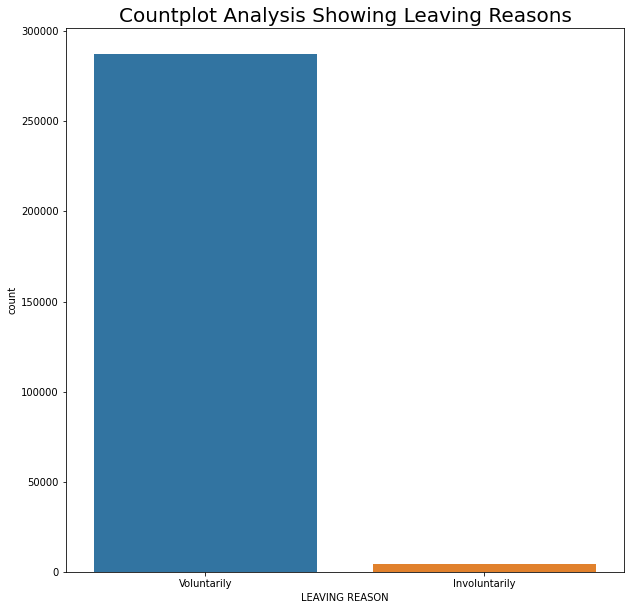

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['LEAVING REASON'])
plt.title('Countplot Analysis Showing Leaving Reasons',fontsize=20)
                
plt.show()

### - Clarify what each column represents e.g. **Position Start Date**, **Position End Date** as against **Leaving Date**... since i am confused

### - Get his input as to the next steps to take. 

### - How do you get the cost per hire. 




In [ ]:
#Checking for blanks in the Data
df.isna().sum()

Month Number                 0
START PERIOD                 0
END PERIOD                   0
REPORT RUN PERIOD            0
REPORT MONTH                 0
                         ...  
PERSON ID                19419
distinct person id           0
Unnamed: 89             291837
distinct position id         0
Churn                        0
Length: 92, dtype: int64

In [ ]:
# Checking summary of the numeric columns og thr Data
df.describe()

,Month Number,REPORT MONTH,YTD FLAG,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,JOINER IN PERIOD,LEAVER IN PERIOD,HEADCOUNT PERIOD END,New position in period,...,Pro Rated Salary,Off Scale Salary,Actual Scalepoint Val,Academic employment function code,SERVICE LENGTH DAYS,SERVICE LENGTH YEARS,ONE YEARS SERVICE FLAG,distinct person id,Unnamed: 89,distinct position id
count,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,291837.000000,...,262465.000000,1233.000000,261232.000000,291123.000000,271696.000000,271696.000000,291837.000000,291837.000000,0.0,291837.0
mean,-6.597659,5.776481,0.166874,0.069172,0.069172,0.131337,0.028482,0.033197,0.914284,0.049439,...,21379.503468,75014.393706,33401.180277,3.023787,2386.455108,6.059364,0.679808,0.933459,NaN,1.0
std,4.060749,3.601480,0.372864,0.253747,0.253747,0.337769,0.166345,0.179150,0.279944,0.216782,...,22945.565649,55555.945805,17828.507202,1.432128,3012.187684,8.225584,0.466551,0.249225,NaN,0.0
min,-13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,17354.480000,14767.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0
25%,-10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,22494.000000,18189.000000,1.000000,327.000000,0.000000,0.000000,1.000000,NaN,1.0
50%,-7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,17361.000000,70059.000000,28331.000000,4.000000,1037.000000,2.000000,1.000000,1.000000,NaN,1.0
75%,-3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,37467.000000,85838.000000,43686.000000,4.000000,3411.000000,9.000000,1.000000,1.000000,NaN,1.0
max,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,251593.000000,251593.000000,159307.000000,9.000000,19876.000000,54.000000,1.000000,1.000000,NaN,1.0


In [ ]:
#Table showing correlation among columns
df.corr()

,Month Number,REPORT MONTH,YTD FLAG,FIN YTD START FLAG,FIN YTD START POS,YTD START FLAG - Person,JOINER IN PERIOD,LEAVER IN PERIOD,HEADCOUNT PERIOD END,New position in period,...,Pro Rated Salary,Off Scale Salary,Actual Scalepoint Val,Academic employment function code,SERVICE LENGTH DAYS,SERVICE LENGTH YEARS,ONE YEARS SERVICE FLAG,distinct person id,Unnamed: 89,distinct position id
Month Number,1.000000,0.337683,0.636919,0.012301,0.012301,-0.020799,0.018088,-0.001921,-0.026898,0.014325,...,0.016482,0.004436,0.027358,-0.023545,0.006065,0.006902,-0.025395,-0.029859,NaN,NaN
REPORT MONTH,0.337683,1.000000,-0.491709,0.168303,0.168303,-0.515698,-0.005560,0.035484,-0.022283,-0.014247,...,0.014230,0.016185,0.012887,0.000183,0.011781,0.009492,0.001078,-0.004098,NaN,NaN
YTD FLAG,0.636919,-0.491709,1.000000,-0.122003,-0.122003,0.380795,0.022758,-0.025735,-0.000317,0.028841,...,0.008743,-0.011905,0.017592,-0.022349,-0.003133,-0.000535,-0.029204,-0.014988,NaN,NaN
FIN YTD START FLAG,0.012301,0.168303,-0.122003,1.000000,1.000000,-0.105998,-0.010550,0.003231,-0.019520,0.022487,...,0.010688,0.024562,0.010837,0.008260,0.012634,0.008891,0.001323,-0.021985,NaN,NaN
FIN YTD START POS,0.012301,0.168303,-0.122003,1.000000,1.000000,-0.105998,-0.010550,0.003231,-0.019520,0.022487,...,0.010688,0.024562,0.010837,0.008260,0.012634,0.008891,0.001323,-0.021985,NaN,NaN
YTD START FLAG - Person,-0.020799,-0.515698,0.380795,-0.105998,-0.105998,1.000000,0.056737,-0.020465,0.008857,0.045537,...,-0.003902,-0.002173,-0.001481,-0.005098,-0.007110,-0.004031,0.002254,-0.000756,NaN,NaN
JOINER IN PERIOD,0.018088,-0.005560,0.022758,-0.010550,-0.010550,0.056737,1.000000,0.019670,0.032117,0.651959,...,-0.114709,-0.005290,-0.064777,-0.031371,-0.139650,-0.130864,-0.249485,0.045714,NaN,NaN
LEAVER IN PERIOD,-0.001921,0.035484,-0.025735,0.003231,0.003231,-0.020465,0.019670,1.000000,-0.276274,-0.000879,...,-0.109243,0.020899,-0.061403,-0.016635,-0.086571,-0.086459,-0.073218,0.049474,NaN,NaN
HEADCOUNT PERIOD END,-0.026898,-0.022283,-0.000317,-0.019520,-0.019520,0.008857,0.032117,-0.276274,1.000000,-0.063933,...,0.259868,0.016112,0.089490,-0.019059,0.071262,0.070573,0.369695,0.871979,NaN,NaN
New position in period,0.014325,-0.014247,0.028841,0.022487,0.022487,0.045537,0.651959,-0.000879,-0.063933,1.000000,...,-0.135241,-0.082632,-0.069273,-0.012116,-0.100636,-0.094285,-0.206336,-0.069255,NaN,NaN


In [ ]:
#Checking for the different Division available
df.Division.unique()

array(['Academic Affairs', 'Vice-Chancellor', 'Chief Finance Office',
       'Education', 'Human Resources', 'Research and Enterprise',
       'University Registrar and Secretary', 'Chief Operating Officer',
       'Chief People Officer', 'International'], dtype=object)

In [ ]:
#Sum of Salary Per Division 
df.groupby('Division').SALARY.sum().astype(int).sort_values(ascending=False)[:10]

Division
Vice-Chancellor                       3830113899
Academic Affairs                      2098130012
Education                              691804093
Chief Operating Officer                684262022
Chief Finance Office                   522087946
Research and Enterprise                480810017
University Registrar and Secretary     248697799
Chief People Officer                   131075656
Human Resources                         87017462
International                           43950967
Name: SALARY, dtype: int64

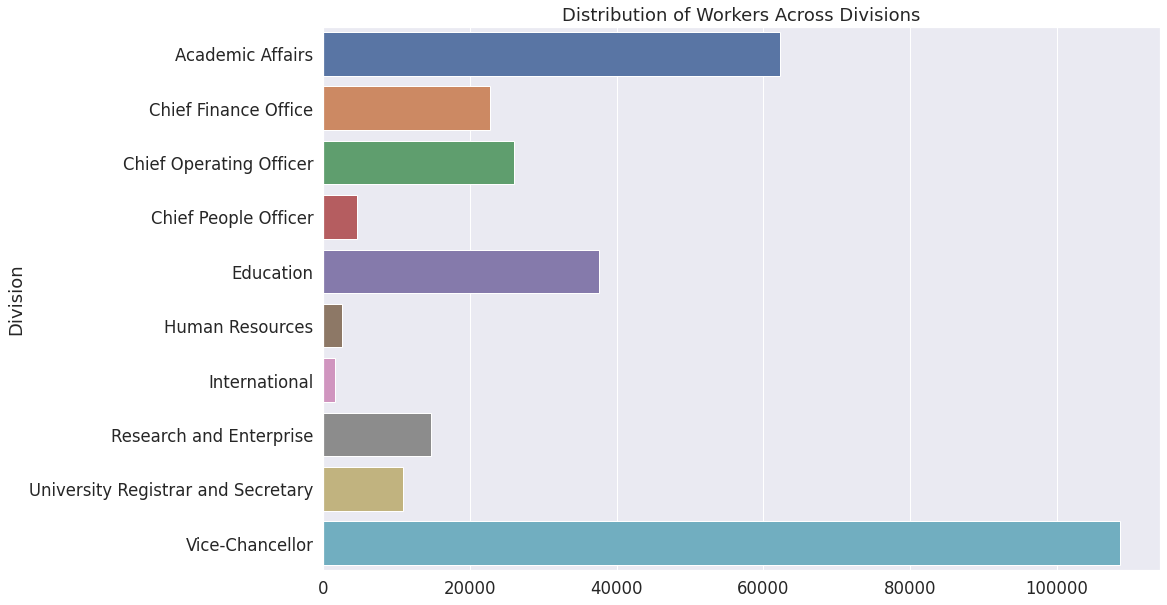

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.barplot(x=df.groupby('Division').Division.count().values,y=df.groupby('Division').Division.count().index)
plt.title('Distribution of Workers Across Divisions')
plt.show()

The graph above shows distribution of employees across different Division with Vice-Chancellor Division 
having the highest and International having the lowest

In [ ]:
reason=df.groupby('LEAVING REASON')['LEAVING REASON'].count().sort_values(ascending=False)[:5]
reason

LEAVING REASON
Voluntarily      287368
Involuntarily      4469
Name: LEAVING REASON, dtype: int64

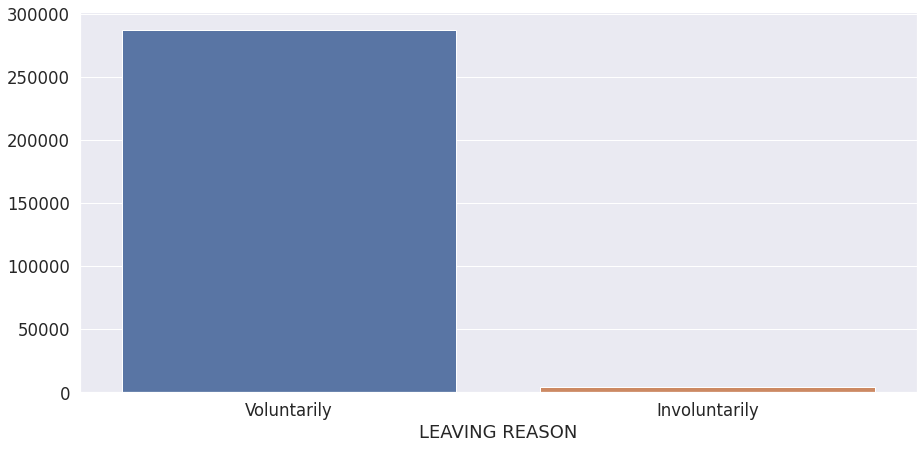

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))
sns.barplot(x=reason.index,y=reason.values)
plt.show()

Top 5 reasons employe's are leaving shows that most employee leave because their 
contract expired anf the lesat top 5 show the retired

In [ ]:
#Distribution of Employee's into Categories
df.groupby('CATEGORY').CATEGORY.count().sort_values(ascending=False )

CATEGORY
Professional    170299
Academic        121376
XX IR35             20
Name: CATEGORY, dtype: int64

In [ ]:
basis=df.groupby('BASIS').BASIS.count().sort_values(ascending=False)
basis

BASIS
Full Time              125774
Atypical                93398
Part Time               53205
Not Set                 15559
Part Time/Term Only      3429
Full Time/Term Only       322
Name: BASIS, dtype: int64

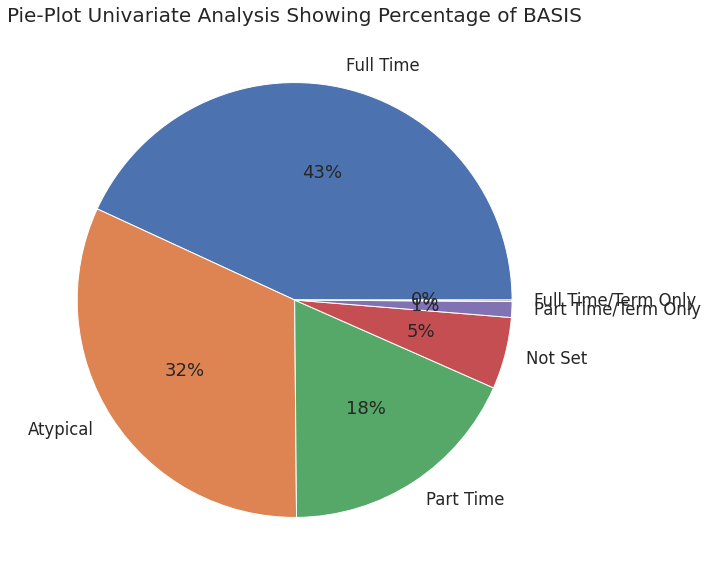

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(basis,labels=basis.index,autopct='%.0f%%')
plt.title('Pie-Plot Univariate Analysis Showing Percentage of BASIS',fontsize=20)
                
plt.show()

The Pie Chart above shows most of the employee's are Full Time Staffs with few Full Time/Term only 

In [ ]:
#The table shows employee's TYPE in desending order
type=df.groupby('TYPE').TYPE.count().sort_values(ascending=False)
type

TYPE
Continuing            147446
Occasional Worker      86880
Fixed Term             25843
Fee                    18108
Casual                  6328
External Agreement      5093
Temporary               2019
XX IR35                   20
Name: TYPE, dtype: int64

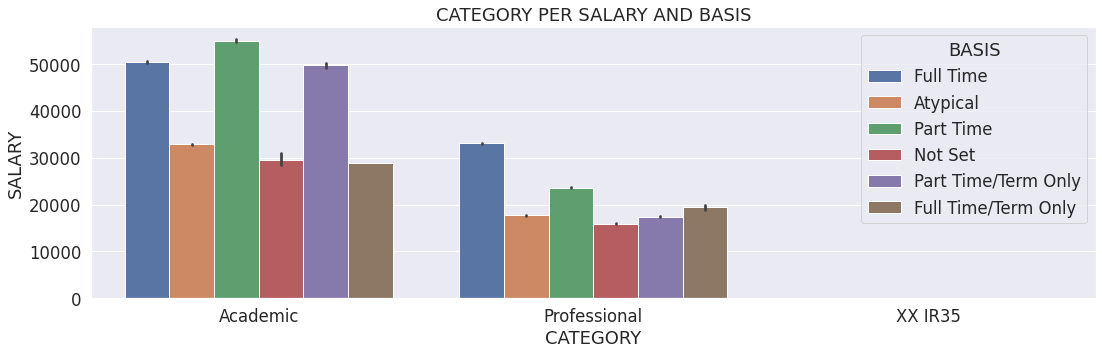

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(18,5))
sns.barplot(x='CATEGORY',
                y='SALARY',
                 hue='BASIS',
                 data=df,
                ).set_title("CATEGORY PER SALARY AND BASIS")
plt.show()

The Graph above shows that:
1. Part time employee's earn more Salary in the Academic Category followed by Full time and Part Time/Term respectively.
2. Full time employee's earn more Salary in the Professional Category followed by Part time and Full Time/Term respectively.

In [ ]:
df['BASIS'].value_counts()

Full Time              125774
Atypical                93398
Part Time               53205
Not Set                 15559
Part Time/Term Only      3429
Full Time/Term Only       322
Name: BASIS, dtype: int64

REPLACE THE **"NOT SET"** VALUES IN THE **"BASIS"** COLUMN WITH THE COLUMN MODE VALUE

In [ ]:
df['BASIS'].isnull().sum()
basis_mode = df['BASIS'].mode()[0]
df['BASIS'].replace('Not Set', basis_mode, inplace=True)

In [ ]:
pd.to_datetime(df['Position Start Date']).dt.day

0        27
1        19
2         4
3         8
4         6
         ..
52430    10
52431     1
52432     9
52433     1
52434    12
Name: Position Start Date, Length: 291837, dtype: int64

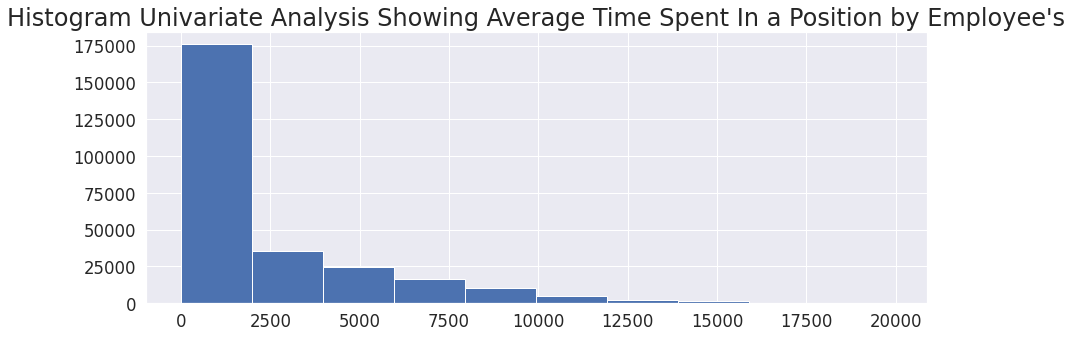

In [ ]:
plt.figure(figsize=(14, 5))
ab=plt.hist(df['SERVICE LENGTH DAYS'])
plt.title("Histogram Univariate Analysis Showing Average Time Spent In a Position by Employee's",fontsize=24)
plt.show()

The graph above shows that most of the employee's only worked between 0-2500days and the higher the work days the lower the employee's.

In [ ]:
print('Lowest Days Spent at a Position: ',df['SERVICE LENGTH DAYS'].min())
print('Highest Days Spent at a Position: ',df['SERVICE LENGTH DAYS'].max())
print('Average Days Spent at a Position: ',df['SERVICE LENGTH DAYS'].mean())

Lowest Days Spent at a Position:  0.0
Highest Days Spent at a Position:  19876.0
Average Days Spent at a Position:  2386.455107914728


**Distribution of Sex Among Employee**

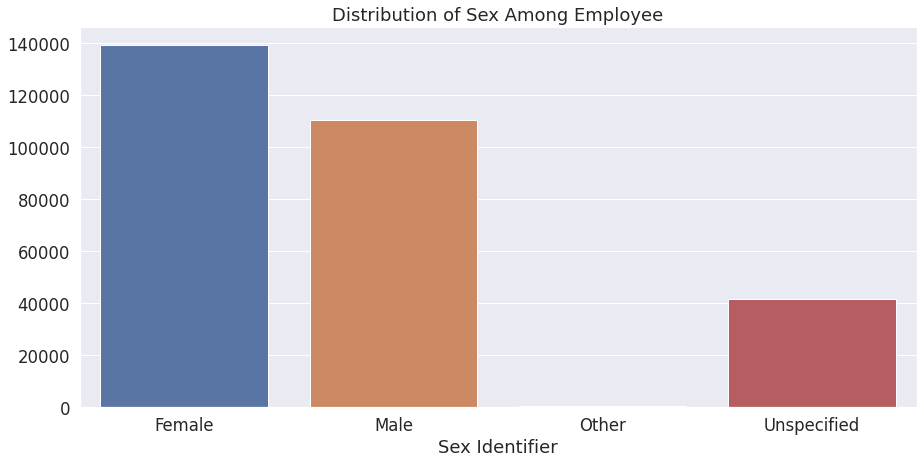

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))
sns.barplot(x=df.groupby('Sex Identifier')['Sex Identifier'].count().index,y=df.groupby('Sex Identifier')['Sex Identifier'].count().values)
plt.title('Distribution of Sex Among Employee')
plt.show()

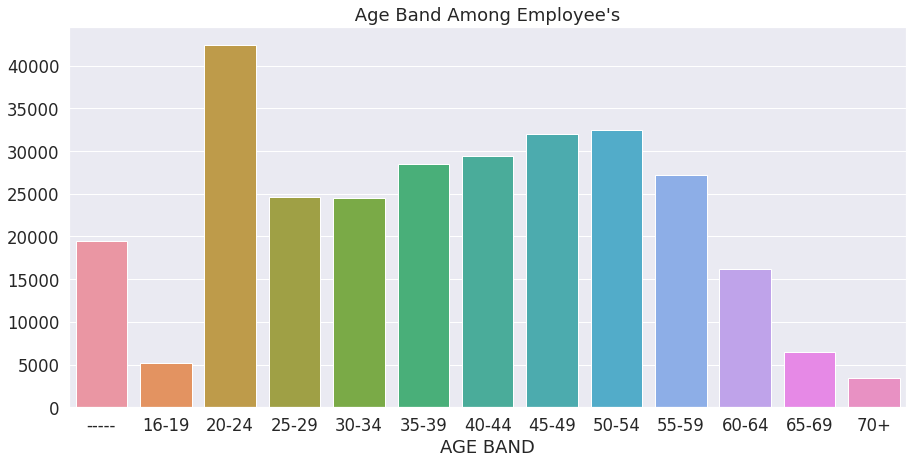

In [ ]:
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,7))
sns.barplot(x=df.groupby('AGE BAND')['AGE BAND'].count().index,
            y=df.groupby('AGE BAND')['AGE BAND'].count().values)
plt.title(" Age Band Among Employee's ")
plt.show()

The Graph above shows that the employee's consist of mostly age 20-24

SUMMARY
1. Division with Vice-Chancellor Division having the highest and International having the lowest
2. Most of the employee's are leaving because their contract has ended
3. The average time spent in a position is  2386Days
4. Part time employee's earn more Salary in the Academic Category followed by Full time and Part Time/Term respectively.
5. Full time employee's earn more Salary in the Professional Category followed by Part time and Full Time/Term respectively.
6. Employee's are mostly Full Time Staffs with few Full Time/Term only
7. Employee's consist of mostly age 20-24


In [ ]:
# A Python program to print all combinations
# with an element-to-itself combination is
# also included
from itertools import combinations_with_replacement

# Get all combinations of [1, 2, 3] and length 2
# for i in range(0,3):
comb = combinations_with_replacement([1, 2, 3], 2)

# Print the obtained combinations
li = []
for i in list(comb):
	li.append(list(i))

print(li)


[[1, 1], [1, 2], [1, 3], [2, 2], [2, 3], [3, 3]]


In [ ]:
# Check the "distinct person id" unique values
df['distinct person id'].unique()

array([0, 1])

In [ ]:
df.isna().sum()

Month Number                 0
START PERIOD                 0
END PERIOD                   0
REPORT RUN PERIOD            0
REPORT MONTH                 0
                         ...  
PERSON ID                19419
distinct person id           0
Unnamed: 89             291837
distinct position id         0
Churn                        0
Length: 92, dtype: int64

In [ ]:
df.shape

(291837, 92)

The **Role Title** column has too many values, so we are spliiting the vales and the extract the first value which is the role of the Employees.

In [ ]:
# Extracting Role 
df['Role Title'] = df['Role Title'].str.split(' ').str[0]
df['Role Title'].unique()

array(['Administrator', 'TSS', 'Manager', 'Personal', 'Team', 'Academic',
       'Research', 'Professor', 'Specialist', 'Graduate', 'Clinical',
       'Z99', 'Teaching', 'Consultant', 'Nurse', 'Occasional', 'Senior',
       'KTP', 'Craftworker', 'Community', 'Catering', 'Fitness',
       'Leisure', 'University', 'Dean', nan, 'External', 'Adminstrator',
       'Administration', 'EAP'], dtype=object)

REPLACE THE **Not Available** values in the **Religion Or Belief** column with NaN Values, And Then replacing those NaN values to **No Religion**, as column sets to NaN basically means the employee isn't Religious

In [ ]:
df['Religion Or Belief'].replace('Not Available', np.NaN, inplace=True)

# Replace nan values in the "Religion or belief" column with "No Religion"
df['Religion Or Belief'].replace(np.NaN, "No Religion", inplace=True)

In [ ]:
# Check the Unique Values
df['Religion Or Belief'].unique()

array(['No Religion', 'Prefer not to say', 'Any Other Religion or Belief',
       'Christian', 'Spiritual', 'Jewish', 'Buddhist', 'Sikh', 'Muslim',
       'Hindu'], dtype=object)

**Looping through each columns in the DataFrame to check the names, data types, and the sum of Null Values in Each column.**

In [ ]:
cols = df.columns
for col in cols:
  print(col)
  print(df[col].dtype)
  print(df[col].isnull().sum())
  print("="*100)


Month Number
int64
0
START PERIOD
datetime64[ns]
0
END PERIOD
datetime64[ns]
0
REPORT RUN PERIOD
object
0
REPORT MONTH
int64
0
YTD FLAG
int64
0
Academic Year
object
0
FIN YTD START FLAG
int64
0
FIN YTD START POS
int64
0
YTD START FLAG - Person
int64
0
JOINER IN PERIOD
int64
0
LEAVER IN PERIOD
int64
0
HEADCOUNT PERIOD END
int64
0
New position in period
int64
0
Position Ended in Period
int64
0
Position Count Period End
int64
0
FTE PERIOD END
float64
0
Permanent Budget FTE Period End
float64
0
Temporary Budget FTE Period End
float64
0
Total Budgeted FTE Period End
float64
0
Total Annual Budgeted FTE Period End
float64
0
FTE Joiners
float64
0
FTE LEAVERS
float64
0
FTE Position Started
float64
0
FTE Position Ended
float64
0
IN PERIOD STATUS
object
0
In Period EST Status
object
0
Date used for Reference Data
datetime64[ns]
0
Division
object
0
Faculty / Professional Directorate
object
0
Position Start Date
datetime64[ns]
0
Position End date
datetime64[ns]
105899
ANNUAL WEEKS WORKED
float64
0


**REPLACE NAN VALUES WITH THEIR COLUMN MODE VALUES**

In [ ]:
# Working with NAN columns
cols_with_nans = ['CONTRACTUAL HOURS', 'Hours Variance', 'CATEGORY', 'BASIS', 'TYPE', 'Role Title', 
'SALARY','Pro Rated Salary', 'JOB FAMILY','ETHNIC GROUP']

for cols in df[cols_with_nans]:
  cols_mode = df[cols].mode()[0]
  df[cols].replace(np.NaN, cols_mode, inplace=True)

In [ ]:
df[cols_with_nans].isnull().sum()

CONTRACTUAL HOURS    0
Hours Variance       0
CATEGORY             0
BASIS                0
TYPE                 0
Role Title           0
SALARY               0
Pro Rated Salary     0
JOB FAMILY           0
ETHNIC GROUP         0
dtype: int64

In [ ]:
# Converting REPORT RUN PERIOD dtype to Datetime64
df['REPORT RUN PERIOD'] = pd.to_datetime(df['REPORT RUN PERIOD'])

In [ ]:
df.shape

(291837, 92)

**Replacing all forms of disabilities and "No Known Disability' values to 'YES', and all NaN values to 'NO'. So the disabilty column will consist of 3 Values which are [YES, NO, PREFER NOT TO SAY]**...... 

In [ ]:
# Working On the "HESA Disabilities" column
df['HESA Disability'].replace('No known disability', 'Yes', inplace=True)

In [ ]:
# Disability category
dis_val =['Long standing illness or health condition e.g. cancer, HIV, diabetes etc.',
       'Mental health condition, such as depression, schizophrenia or anxiety disorder',
       'Specific learning difficulty such as dyslexia, dyspraxia or AD(H)D',
       'Physical impairment or mobility issues e.g. difficulty using arms or legs',
       'Blind or a serious visual impairment uncorrected by glasses',
       'Two or more impairments and/or disabling medical conditions',
       'Disability, impairment or medical condition that is not listed above',
       "Social/communication impairment e.g. Asperger's or other autistic disorder",
       'Deaf or serious hearing impairment',
       "General learning disability (such as Down's syndrome)"]
       
df['HESA Disability'].replace(dis_val, 'Yes', inplace=True)

In [ ]:
df['HESA Disability'].replace(np.NaN, "No", inplace=True)

In [ ]:
df['HESA Disability'].unique()

array(['No', 'Yes', 'Prefer not to say'], dtype=object)

**Drop All Datetime Objects**

In [ ]:
# drop the datetime columns
datetime_obj = df.select_dtypes(include='datetime64').columns.tolist()
df.drop(datetime_obj, axis=1, inplace=True)

In [ ]:
df['AGE BAND'].unique()

array(['-----', '25-29', '70+', '40-44', '30-34', '20-24', '35-39',
       '60-64', '45-49', '55-59', '50-54', '65-69', '16-19'], dtype=object)

**Replace the special characters in the "SALARY BAND" & "AGE BAND" with the columns mode**

In [ ]:
# Working with the AGE BAND column
age_mode = df["AGE BAND"].mode()[0]
df["AGE BAND"].replace("-----", age_mode, inplace=True)

# Working with the SALARY BAND column
salary_mode = df["SALARY BAND"].mode()[0]
df["SALARY BAND"].replace("------", salary_mode, inplace=True)

**Rename the "AGE BAND" column to "AGE GROUP", and then grouping to the categories the belongs to [Teen, Youth, Adult, Old]** 

In [ ]:
# AGE grouping and column Renaming

df.rename({"AGE BAND": "AGE GROUP"}, axis=1, inplace=True)
df['AGE GROUP'].replace(["16-19", "20-24"], ["Teen","Youth"], inplace=True)
df["AGE GROUP"].replace(["25-29","30-34","35-39","40-44","45-49","50-54","55-59"], "Adult", inplace=True)
df["AGE GROUP"].replace(["60-64", "65-69", "70+"], "Old", inplace=True)

In [ ]:
df["AGE GROUP"].unique()

array(['Youth', 'Adult', 'Old', 'Teen'], dtype=object)

**Drop unnecessary columns from the DataFrame**

In [ ]:
# Drop columns
cols_to_drop = ['Vacant Hours as a % of Total Establishment', 'Budget Effective Date', 'Vacant FTE as a % of Total Establishment', 'Post reference',
                'GRADE DESC', 'Establishment Grade', 'Scalept Description', 'ACF Agreed Date', "Leaving Reason Category", "SERVICE LENGTH BAND",
                'PARTY LNK ID OCCUPANCY', 'PERSON ID', 'Expected Occupancy End Reason','ORG PARTY ID','POSITION ID',
                'distinct person id', 'Academic Year', 'distinct position id', 'Month Number']
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
# Position Grouping
df['Position Grouping'].replace("**Other Academic **", "Other Academic",inplace=True)

In [ ]:
df['Position Grouping'].unique()

array(['Other Academic', nan, 'Lecturer/Tutor', 'Researcher', 'Professor',
       'Senior Lecturer', 'Reader'], dtype=object)

**Since the "Vacancy Status" consists of NaN and "position filled" values, so we are converting the NaN values to "position vacant' value because a position can either be filled or vacant.**

In [ ]:
# Vacancy Status
df['Vacancy Status'].replace(np.NaN, "Position Vacant", inplace=True)

In [ ]:
df['Vacancy Status'].unique()

array(['Position Vacant', 'Position Filled'], dtype=object)

**REPLACE THE "Not Stated" values in the "ETHNIC GROUP" column with NaN Values**

In [ ]:
# Replace "Not stated" values in the "ethnic group" column with nan
df['ETHNIC GROUP'].replace("Not Stated", np.NaN, inplace=True)

**Looping through columns with object datatypes and then getting the unique values of those columns**

In [ ]:
cols_with_obj_dtypes = df.select_dtypes(include=['object'])

for cols in cols_with_obj_dtypes:
  print(cols)
  print(df[cols].unique())
  print("="*100)

IN PERIOD STATUS
['Vacant' 'Active Period End' 'Leaver' 'Joiner' 'Joiner/Leaver']
In Period EST Status
['Added' 'Active Period End' 'Subtracted']
Division
['Academic Affairs' 'Vice-Chancellor' 'Chief Finance Office' 'Education'
 'Human Resources' 'Research and Enterprise'
 'University Registrar and Secretary' 'Chief Operating Officer'
 'Chief People Officer' 'International']
Faculty / Professional Directorate
['Academic Affairs' 'Faculty of Arts Cultures and Education'
 'Faculty of Business, Law and Politics' 'Faculty of Health Sciences'
 'Faculty of Science and Engineering' 'Other' 'University Library'
 'Campus and Accommodation Services' 'Estates' 'Finance Directorate'
 'Information and Communication Technology' 'Education'
 'Student Recruitment Directorate' 'Human Resources'
 'PVC Research and Enterprise Office' 'Student Services' 'COO Office'
 'Information Services Directorate' 'Student Services Commercial'
 'International' 'Aura' 'Doctoral College' 'Institutes'
 'Research and Inno

**Fill the NaN values in object data type columns with the columns mode**

In [ ]:
# replace null values
obj_na_cols = ['Establishment Contract Type','academic employment function description', 'ACF Core Domain Focus', 
               'STEMM Indicator', 'Position Grouping', 'ETHNIC GROUP']

for na_values in df[obj_na_cols]:
  na_mode = df[na_values].mode()[0]
  df[na_values].fillna(na_mode, inplace=True)

In [ ]:
df.shape

(291837, 63)

**Drop all remaining columns with NaN values after the needed column has been filled with their mode**

In [ ]:
# Drop na
df.dropna(axis=1, inplace=True)

In [ ]:
df.shape

(291837, 56)

**Replacing The "Unspecified" value in the "Sex Identifier" column with the column mode**

In [ ]:
# Replacing The "Unspecified" value in the "Sex Identifier" column
sex_mode = df['Sex Identifier'].mode()[0]
df['Sex Identifier'].replace("Unspecified", sex_mode, inplace=True)

In [ ]:
df['Sex Identifier'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

**Replace "YES" with 1 and "NO" with 0 in the "Churn column"**

In [ ]:
# REplace "YES" with 1 and "NO" with 0 in the "Churn column"
df['Churn'] = np.where(df['Churn']=="Yes", 1, 0)

In [ ]:
df['Churn'].sample(5)

9015     0
4434     1
2247     0
13828    0
45881    1
Name: Churn, dtype: int64

**Encoding Columns with categorical values**

In [ ]:
# Working on Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=cat_cols)

**Specifying The Features and the Target Variables**

In [ ]:
# DATA SEGMENTATION
labels = df["Churn"].copy()
features = df.drop("Churn", axis=1).copy()

**Normalizing the features before fitting it to the model**

In [ ]:
# Features Normalization
sc = StandardScaler()
features = sc.fit_transform(features)

**Splitting The Data into "Training" & "Validation" Set**

In [ ]:
# Splitting data into Training and Validation Set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((204285, 190), (87552, 190), (204285,), (87552,))

Model1 : **RANDOM FOREST CLASSIFIER**

Roc AUC:rfc 0.9877899848514174
Model Accuracy:rfc 0.9525082236842105
Classification Report For:rfc               precision    recall  f1-score   support

           0       0.95      0.96      0.96     48173
           1       0.95      0.94      0.95     39379

    accuracy                           0.95     87552
   macro avg       0.95      0.95      0.95     87552
weighted avg       0.95      0.95      0.95     87552


Roc AUC:gdb 0.9182531965406702
Model Accuracy:gdb 0.8384160270467836
Classification Report For:gdb               precision    recall  f1-score   support

           0       0.82      0.90      0.86     48173
           1       0.86      0.77      0.81     39379

    accuracy                           0.84     87552
   macro avg       0.84      0.83      0.83     87552
weighted avg       0.84      0.84      0.84     87552


Roc AUC:xgb 0.9165068246248456
Model Accuracy:xgb 0.8384959795321637
Classification Report For:xgb               precision    recall  f1-score   s

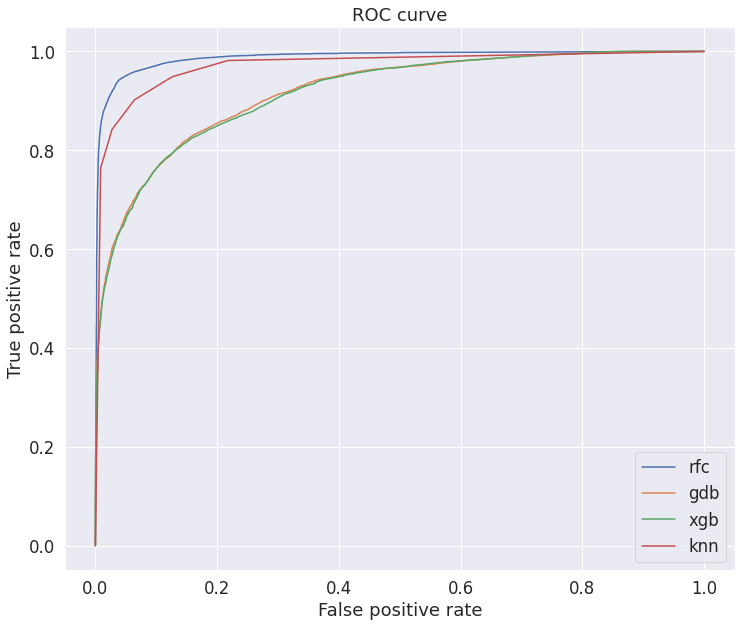

In [ ]:
# Model names
names = ["rfc","gdb","xgb","knn"]

# Instantiating all Models
models = [
RandomForestClassifier(n_estimators=200),
GradientBoostingClassifier(),
XGBClassifier(),
KNeighborsClassifier()
]

plt.figure(figsize=(12,10))
for name,model in zip(names,models):

	model.fit(X_train,y_train)
	y_pred = model.predict(X_test)
	y_proba = model.predict_proba(X_test)[:,1]
	print("Roc AUC:"+name, roc_auc_score(y_test, model.predict_proba(X_test)[:,1],average='macro'))
	print("="*100)
	print("Model Accuracy:"+name, accuracy_score(y_test, y_pred))
	print("="*100)
	print("Classification Report For:"+name, classification_report(y_test, y_pred))
	print()
	fpr, tpr, thresholds = roc_curve(y_test, y_proba)
	plt.plot(fpr, tpr, label=name)
 

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ModelsROCCurve.png')
plt.show()          

In [ ]:
models[0]

RandomForestClassifier(n_estimators=200)

After the model evaluation and ROC curve plotting we did above, we were able to come into conclusion that the **RandomForestClassifier** is the best model so far, so we will then save the  randomforest model into a **.Pkl** file for future use.


In [ ]:
import joblib
joblib.dump(model[0], "./drive/MyDrive/Employees_Churn_Prediction/EmployeesChurnModel.pkl")

['./drive/MyDrive/Employees_Churn_Prediction/EmployeesChurnModel.pkl']